In [35]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

all_test_data = pd.read_csv("/Users/nathannusaputra/PycharmProjects/untitled1/house_price_prediction/data_raw/test.csv")
train_df_raw = pd.read_csv("/Users/nathannusaputra/PycharmProjects/untitled1/house_price_prediction/data_raw/train.csv")
# split into dev data
test_data_housing = all_test_data.copy()

In [36]:
# show how many nulls there are for each
null_values = train_df_raw.isnull().sum().sort_values(ascending=False)
null_values.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [49]:
# delete the columns that have null values
lst_null = null_values.iloc[:20].index.to_list()
train_df_raw = train_df_raw.drop(lst_null, axis=1)

KeyError: "['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu' 'LotFrontage'\n 'GarageCond' 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual'\n 'BsmtExposure' 'BsmtFinType2' 'BsmtFinType1' 'BsmtCond' 'BsmtQual'\n 'MasVnrArea' 'MasVnrType' 'Electrical' 'Utilities'] not found in axis"

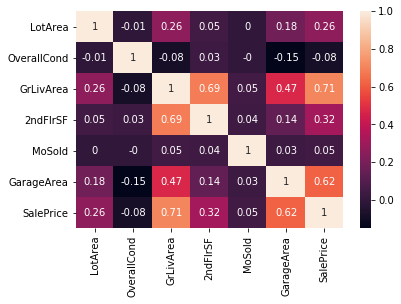

In [38]:
# section off data to only include integers to create a heat map
train_df_raw_2 = train_df_raw.select_dtypes(include=['float64', int])
train_df_raw_2 = train_df_raw[['LotArea','OverallCond','GrLivArea','2ndFlrSF','MoSold','GarageArea','SalePrice']]
# use seaborn to create correlation matrix
train_df_corr = train_df_raw_2.corr().round(2)
sns.heatmap(data=train_df_corr, annot=True)
plt.show()

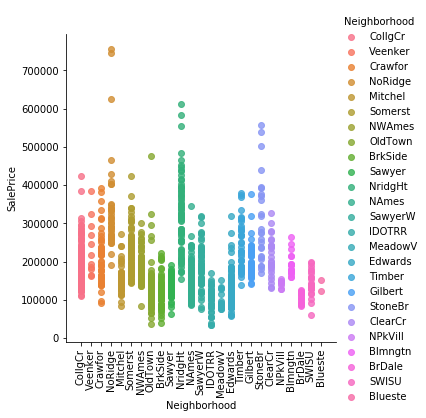

In [39]:
neighborhood_df = train_df_raw[['Neighborhood','SalePrice', 'YearBuilt']]
neigh_plot = sns.lmplot('Neighborhood', 'SalePrice', data=neighborhood_df, hue='Neighborhood', fit_reg=False)
neigh_plot.set_xticklabels(rotation=90)

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

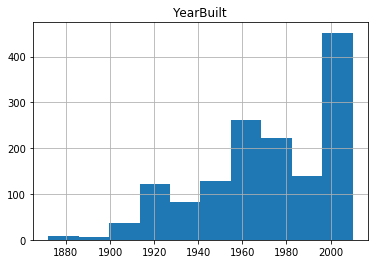

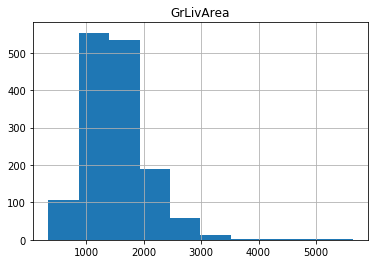

In [40]:
# Neighborhood
train_df_raw['Neighborhood'].value_counts()
# YearBuilt
train_df_raw.hist(column='YearBuilt')
# GrLivArea
train_df_raw.hist(column='GrLivArea')
# HouseStyle
train_df_raw['HouseStyle'].value_counts()
# BldgType
train_df_raw['BldgType'].value_counts()
# bedroom average
train_df_raw['BedroomAbvGr'].value_counts()

In [41]:
# EDA on test data
# delete the columns that have null values
# show how many nulls there are for each
null_values_test = test_data_housing.isnull().sum().sort_values(ascending=False)
null_values_test.head(34)


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
dtype: int64

In [42]:
lst_null_test = null_values_test.iloc[:33].index.to_list()
test_data_housing = test_data_housing.drop(lst_null, axis=1)

In [43]:
# Section Data into Train and Test

In [70]:
X = train_df_raw.iloc[:,:-1]
y = train_df_raw.iloc[:,-1]
train_data_bl, dev_data_bl, train_labels_bl, dev_labels_bl = train_test_split(X,y, test_size=0.5)

In [71]:
# Linear Regression
train_data_bl_linear = train_data_bl[['LotArea', 'GrLivArea','GarageArea']]
dev_data_bl_linear = dev_data_bl[['LotArea','GrLivArea', 'GarageArea']]


lm = linear_model.LinearRegression()
model = lm.fit(train_data_bl_linear, train_labels_bl)
predictions = lm.predict(train_data_bl_linear)
lm.score(dev_data_bl_linear, dev_labels_bl)


0.5505286829828495

In [76]:
# Linear Regression add neighborhood as dummy
neigh_dummy = pd.get_dummies(train_data_bl['Neighborhood'], drop_first=False)

neigh_list = train_data_bl['Neighborhood'].unique().tolist()

train_data_bl = pd.concat([train_data_bl,neigh_dummy], axis=1)
dev_data_bl = pd.concat([train_data_bl,neigh_dummy], axis=1)

neigh_list = neigh_list+['LotArea', 'GrLivArea','GarageArea']

train_data_bl_linear_2 = train_data_bl[neigh_list]
dev_data_bl_linear_2 = dev_data_bl[neigh_list]


lm = linear_model.LinearRegression()
model = lm.fit(train_data_bl_linear_2, train_labels_bl)
predictions = lm.predict(train_data_bl_linear_2)
lm.score(dev_data_bl_linear_2, dev_labels_bl)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 98 is different from 122)

In [73]:
print(neigh_list)

['Somerst', 'BrkSide', 'OldTown', 'IDOTRR', 'CollgCr', 'SawyerW', 'Sawyer', 'ClearCr', 'NoRidge', 'SWISU', 'NridgHt', 'Veenker', 'Gilbert', 'NAmes', 'Crawfor', 'NWAmes', 'Edwards', 'Blmngtn', 'MeadowV', 'StoneBr', 'Mitchel', 'Timber', 'BrDale', 'NPkVill', 'LotArea', 'GrLivArea', 'GarageArea']
